In [1]:
#Importación librerías
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Cargamos el modelo
diabetes_dataset = pd.read_csv('./dataset/diabetes.csv') 
diabetes_dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
diabetes_dataset.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Determinamos un total de 768 datos, que hacen referencia a la presencia de personas con diabetes o no, esta variable se encuentra establecida en la columna denominada como *OUTCOME*

## EDA Y PREPROCESAMIENTO DE LOS DATOS 

### EXPLORACIÓN DE DATOS, DISTRIBUCIÓN

In [7]:
import matplotlib.pyplot as plt

Antes de comenzar vamos a analizar que columnas tienen o no la presencia de nulos, para ello, podemos realizarlo de dos formas:
- La primera determinando si alguna de las columnas tienen o no nulos
- La segunda realizando la suma de nulos por cada columnas


In [8]:
columnas_con_nulos = diabetes_dataset.columns[diabetes_dataset.isnull().any()]
columnas_con_nulos

Index([], dtype='object')

In [9]:
valores_nulos_por_columna = diabetes_dataset.isnull().sum()
valores_nulos_por_columna

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Una vez realizada la comprobación, podemos observar que no existe ninguna columna con ningún dato nulo, lo que nos aporta una gran ventaja en el desarrollo del trabajo , puesto que nos vamos a ahorrar la necesidad del tratamiento de los mismos.

A continuación, mostramos que tipo de datos tenemos asociados a cada una de las columnas

In [10]:
# Tipo de dato
diabetes_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Denotamos que todos los datos son o enteros o float. En eras de simplificar el presente trabajo, vamos a cambiar todos los datos a tipo float64 buscando tener los datos en un mismo formato.


In [11]:
diabetes_dataset = diabetes_dataset.astype({'Pregnancies': 'float64', 'Glucose': 'float64', 'BloodPressure': 'float64', 
                                            'SkinThickness': 'float64', 'Insulin': 'float64', 'BMI': 'float64', 
                                            'DiabetesPedigreeFunction': 'float64', 'Age': 'float64', 'Outcome': 'float64'})

diabetes_dataset.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

Ya tenemos todos los datos en formato float64

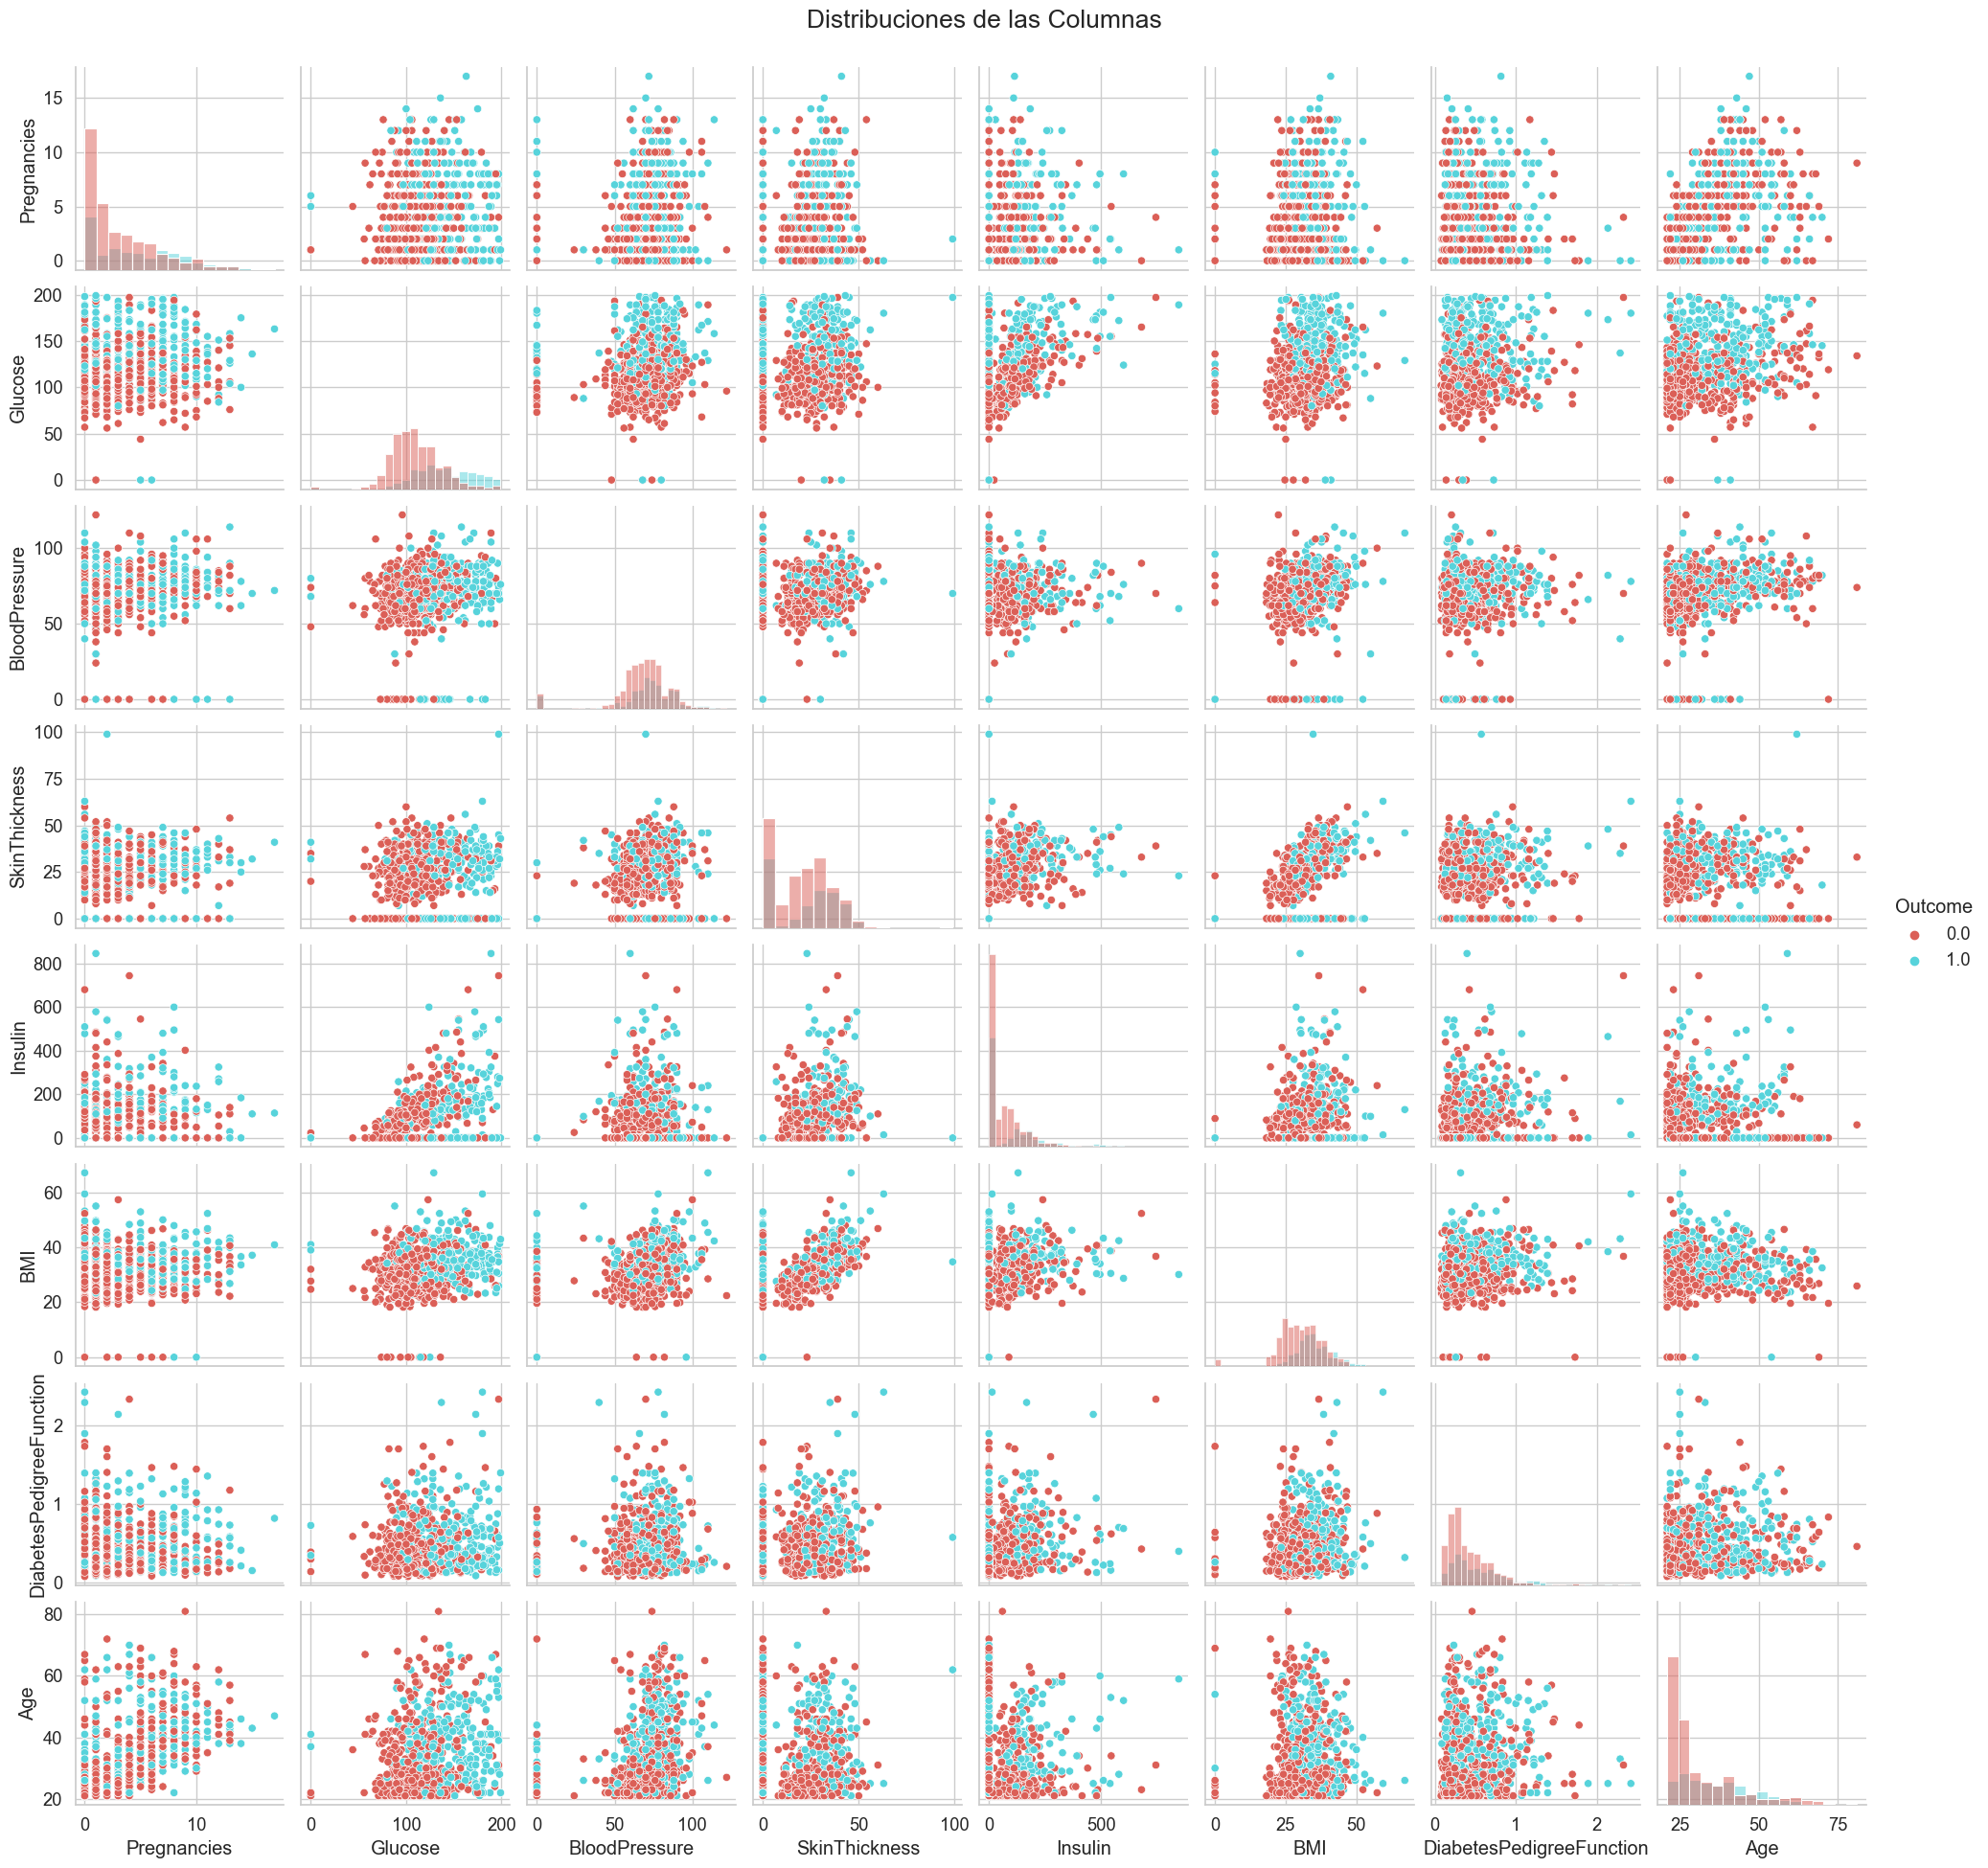

In [12]:

sns.set(style="whitegrid")

colores = sns.color_palette(palette='hls', n_colors=2)

#Matrizde gráficos para las distribuciones de cada columna 
sns.set_context("notebook", font_scale=1.2)
sns.pairplot(diabetes_dataset,  diag_kind="hist", hue='Outcome', palette=colores)

# Ajuste de los espacios para que se vea mejor
plt.subplots_adjust(top=0.95)
plt.suptitle('Distribuciones de las Columnas', fontsize=19)
plt.show()

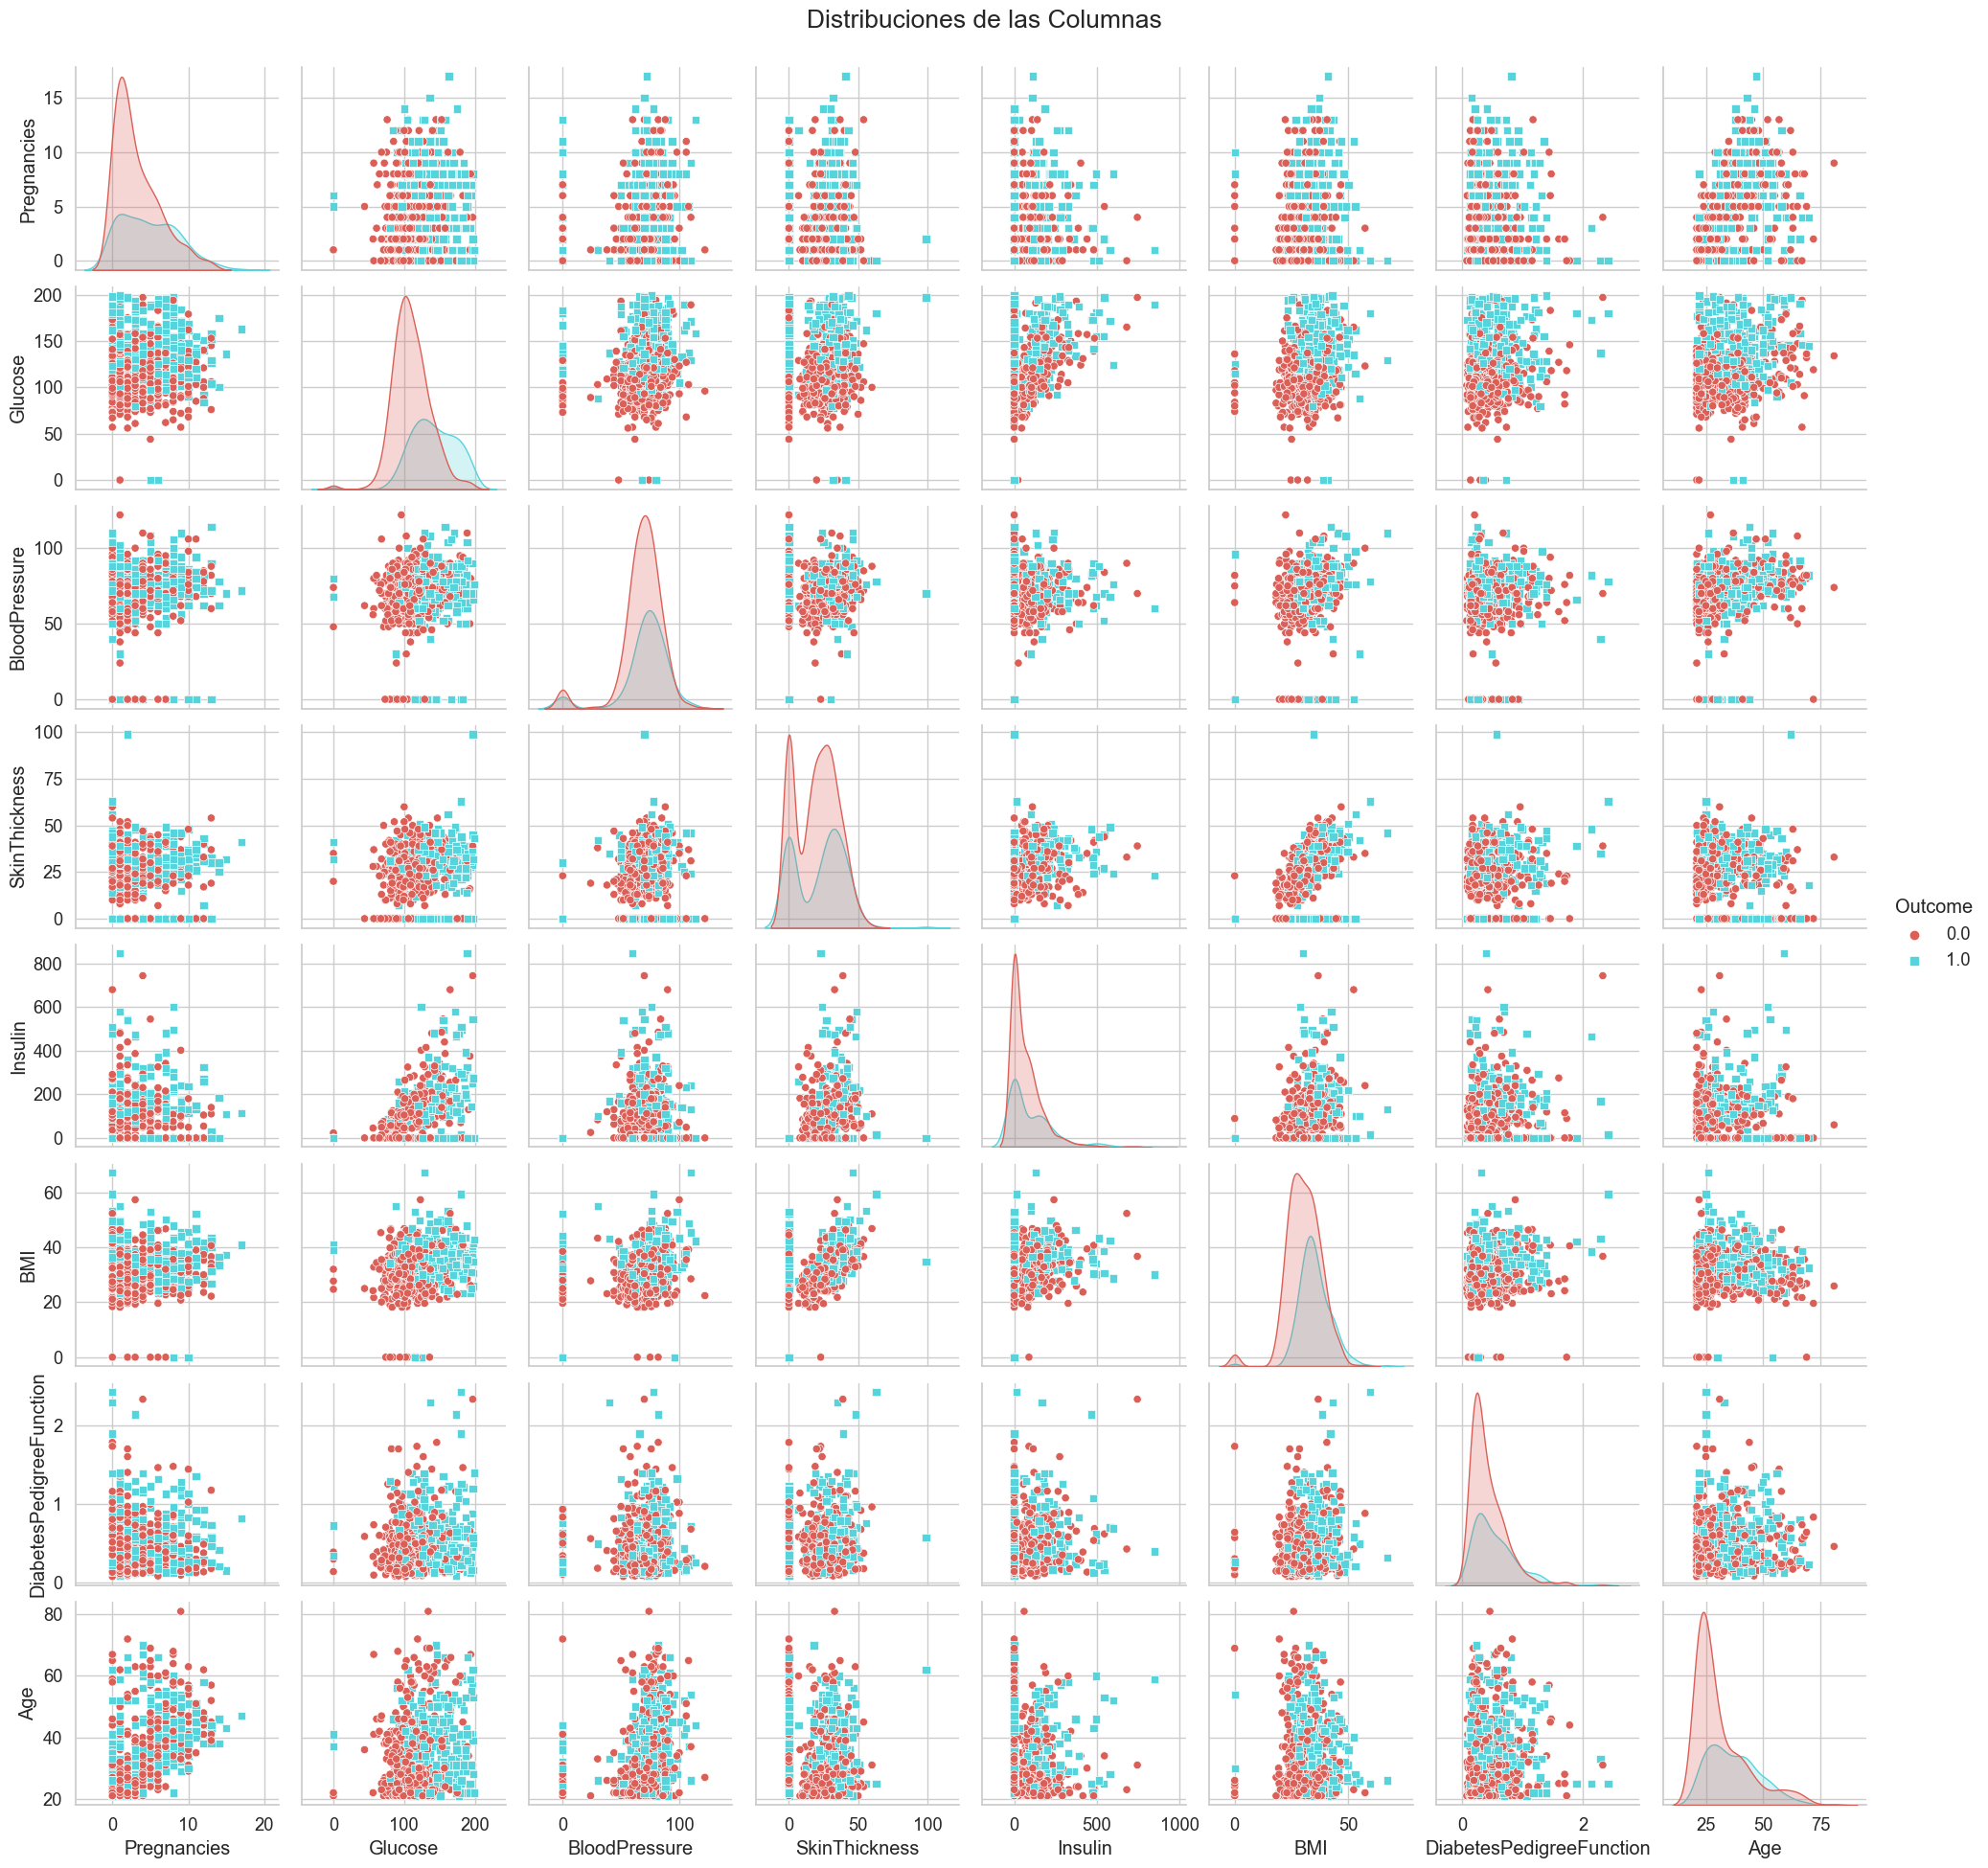

In [13]:

sns.set(style="whitegrid")

colores = sns.color_palette(palette='hls', n_colors=2)

#Matrizde gráficos para las distribuciones de cada columna 
sns.set_context("notebook", font_scale=1.2)
sns.pairplot(diabetes_dataset, hue='Outcome', palette=colores, markers=["o", "s"])
# Ajustar los espacios entre las subparcelas
plt.subplots_adjust(top=0.95)
plt.suptitle('Distribuciones de las Columnas', fontsize=19)
plt.show()

### SEPARACIÓN DEL CONJUNTO DE DATOS EN X e Y

In [14]:
X = diabetes_dataset.drop('Outcome', axis=1)
y = diabetes_dataset['Outcome']


In [15]:
X.shape

(768, 8)

In [16]:
y.shape

(768,)

### DETECCIÓN Y ELIMINACIÓN DE OUTLIERS

In [17]:
# Función para identificar outliers utilizando el método del rango intercuartílico , primera de las técnicas planteadas
def detectar_outliers(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = columna[(columna < limite_inferior) | (columna > limite_superior)]
    return outliers

In [18]:
# Detectar outliers en cada columna
outliers_por_columna = {}
for col in X.columns:
    outliers_por_columna[col] = detectar_outliers(X[col])

# Conteo de los outliers por cada columna
conteo_outliers_por_columna = {col: outliers.shape[0] for col, outliers in outliers_por_columna.items()}

# Mostramos e el conteo de outliers por columna
for col, conteo in conteo_outliers_por_columna.items():
    print(f"Total de outliers en la columna '{col}': {conteo}")

Total de outliers en la columna 'Pregnancies': 4
Total de outliers en la columna 'Glucose': 5
Total de outliers en la columna 'BloodPressure': 45
Total de outliers en la columna 'SkinThickness': 1
Total de outliers en la columna 'Insulin': 34
Total de outliers en la columna 'BMI': 19
Total de outliers en la columna 'DiabetesPedigreeFunction': 29
Total de outliers en la columna 'Age': 9


In [19]:
# Función para identificar outliers utilizando el método del Z-score , segunda de las técnicas planteadas
def detectar_outliers_zscore(columna):
    z_scores = np.abs((columna - columna.mean()) / columna.std())
    outliers = columna[z_scores > 3]  # Usando un umbral de 3 para el z-score , más empleado por norma comun pero se puede variar
    return outliers



In [20]:
# Detectar outliers en cada columna usando el Z-score
outliers_por_columna_zscore = {}
for col in X.columns:
    outliers_por_columna_zscore[col] = detectar_outliers_zscore(X[col])


# Conteo de los outliers por cada columna
conteo_outliers_por_columna_zscore = {col: outliers.shape[0] for col, outliers in outliers_por_columna_zscore.items()}

# Mostramos el conteo de outliers por columna
for col, conteo in conteo_outliers_por_columna_zscore.items():
    print(f"Total de outliers (usando Z-score) en la columna '{col}': {conteo}")
    


#Utilizamos umbral de 2-3 ya que es lo mas frecuente de utilizar

Total de outliers (usando Z-score) en la columna 'Pregnancies': 4
Total de outliers (usando Z-score) en la columna 'Glucose': 5
Total de outliers (usando Z-score) en la columna 'BloodPressure': 35
Total de outliers (usando Z-score) en la columna 'SkinThickness': 1
Total de outliers (usando Z-score) en la columna 'Insulin': 18
Total de outliers (usando Z-score) en la columna 'BMI': 14
Total de outliers (usando Z-score) en la columna 'DiabetesPedigreeFunction': 11
Total de outliers (usando Z-score) en la columna 'Age': 5


In [21]:
# Detectar outliers en cada columna usando el Z-score con un umbral de 3
outliers_indices = []
for col in X.columns:
    outliers_indices.extend(detectar_outliers_zscore(X[col]).index)


In [22]:
# Eliminar filas con outliers tanto de X como de y
X_sin_outliers = X.drop(outliers_indices)
y_sin_outliers = y.drop(outliers_indices)

# Tamaño del conjunto de datos  después de eliminar outliers
print("Dimensiones de X sin outliers:", X_sin_outliers.shape)
print("Dimensiones de y sin outliers:", y_sin_outliers.shape)



Dimensiones de X sin outliers: (688, 8)
Dimensiones de y sin outliers: (688,)


In [23]:
X_sin_outliers


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


### NORMALIZACIÓN DE LAS CARACTERÍSTICAS

Existen varias técnicas de normalización de los datos, como MinMax en la cuál establecemos todos los datos en un rango de 0 a 1, pero pudiendo provocar un pequeño subconjunto dentro del intervalo. Otra de las técnicas más empleadas y la usada en este trabajo consiste en el StandardScaler, este tipo de normalización supone una transformación de los datos a una escala en la que contengan una media de 0 y una desviación estándar (std) de 1.

In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler, MaxAbsScaler

#Los datos los tenemos almacenados en X_sin_outliers y y_sin_outliers
scaler = StandardScaler(copy=True, with_mean=True, with_std=True) #Empleamos los valores por defecto, que son True

X_scaled = scaler.fit_transform(X_sin_outliers)
X_scaled = pd.DataFrame(X_scaled, columns=X_sin_outliers.columns)
y_scaled = y_sin_outliers

In [25]:
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.657355,0.924040,-0.028115,0.923219,-0.805266,0.210285,0.606516,1.479220
1,-0.868490,-1.177082,-0.515765,0.533462,-0.805266,-0.848063,-0.364220,-0.183265
2,1.267694,2.091330,-0.678315,-1.350366,-0.805266,-1.346999,0.764788,-0.095766
3,-0.868490,-1.043678,-0.515765,0.143704,0.238698,-0.621274,-1.011378,-1.058257
4,0.352186,-0.143197,0.134435,-1.350366,-0.805266,-0.999256,-0.891795,-0.270764
...,...,...,...,...,...,...,...,...
683,1.878032,-0.643464,0.296984,1.767693,1.193814,0.104450,-0.997309,2.616709
684,-0.563321,0.056910,-0.190665,0.403542,-0.805266,0.694102,-0.402909,-0.533262
685,0.352186,0.023559,-0.028115,0.143704,0.438606,-0.908540,-0.737040,-0.270764
686,-0.868490,0.190315,-1.003415,-1.350366,-0.805266,-0.318889,-0.371255,1.216722


In [26]:
y_scaled

0      1.0
1      0.0
2      1.0
3      0.0
5      0.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 688, dtype: float64

### SELECCIÓN DE CARACTERÍSTICAS

Una de las principales técnicas de preprocesado consiste en la selección de características , es una técnica que selecciona aquellas características que considera más relevante.

Existen varias téncnicas como en el caso de la normalización, incluyendo métodos univariados, métodos basados en modelos y métodos iterativos.
No existe una técnica con un reconocimiento mayor al resto , por ello vamos a emplear uno proporcionado por la librería sklearn de Python conocido como SelectKBest.




In [28]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier


# Creamos un pipeline con un selector de características y un clasificador, en nuestro caso estamos usando un MLPClassifier
# como clasificador, es decir una red de neuronas
pipe = Pipeline([
  ('selector', SelectKBest(score_func=f_classif)),
  ('classifier', MLPClassifier())
])

In [29]:
# Crear el espacio de búsqueda de parámetros , es decir , que parámetros serán los más óptimos de nuestro modelo   
param_grid = {
  'selector__k': range(3, X_scaled.shape[1] + 1),
  'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
  'classifier__activation': ['relu', 'tanh'],
  'classifier__solver': ['lbfgs', 'sgd', 'adam'],
  'classifier__alpha': [0.0001, 0.001, 0.01, 0.1],
  'classifier__learning_rate': ['constant', 'invscaling', 'adaptive'],
  'classifier__max_iter': [200, 400, 600]
}

In [30]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [26]:
#Creamos el objeto de búsqueda del GridSearchCV es decir la cuadrícula que comprobará cuál es el mejor modelo

search = GridSearchCV(pipe, param_grid, cv=5)

# Ajustar la búsqueda a los datos
search.fit(X_train, y_train)

#Mostramos en pantalla  los mejores parámetros
print("Los mejores parámetros son:", search.best_params_)

Los mejores parámetros son: {'classifier__activation': 'tanh', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (100,), 'classifier__learning_rate': 'constant', 'classifier__max_iter': 400, 'classifier__solver': 'sgd', 'selector__k': 5}


In [27]:

# Validar el modelo en el conjunto de prueba
score = search.score(X_test, y_test)
print("El score del modelo en el conjunto de prueba es:", score)

El score del modelo en el conjunto de prueba es: 0.7753623188405797


In [28]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
278,-0.563321,1.157498,0.134435,-0.246053,0.260910,-0.848063,-0.075813,-0.533262
110,-0.258152,-0.009792,-0.190665,0.598421,0.694044,1.616377,-0.008987,-0.270764
82,-0.563321,-0.943624,-0.840865,0.468502,-0.805266,-0.092100,-1.141513,-0.795759
51,1.267694,0.423773,-0.028115,-1.350366,-0.805266,0.104450,-0.649110,0.516729
218,1.572863,2.124681,1.028459,-0.375972,-0.805266,-0.334008,2.667572,1.391721
...,...,...,...,...,...,...,...,...
71,0.352186,0.557177,2.897784,-1.350366,-0.805266,2.508413,-0.800348,0.341730
106,0.657355,-0.309952,-0.678315,1.183057,-0.805266,0.301001,-0.684282,-0.795759
270,-0.258152,0.990742,0.296984,-1.350366,-0.805266,-1.694742,-0.870692,0.341730
435,-0.563321,-1.043678,1.434834,0.598421,-0.805266,0.195166,-0.571733,0.779226


In [29]:
new_data = pd.DataFrame({
    'Pregnancies': [1],
    'Glucose': [120],
    'BloodPressure': [80],
    'SkinThickness': [30],
    'Insulin': [100],
    'BMI': [25],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [36]
})


In [30]:
# Normalizacion de los datos del conjunto 
new_data_normalized = scaler.transform(new_data)

predictions = search.predict(new_data_normalized)
predictions

array([0.])

In [31]:
import pickle

# Guardar el modelo y el scaler , necesario porque sino, tarda mucho, un total de 26 horas ejecutandose estuvo en mi caso
with open('model.pkl', 'wb') as f:
    pickle.dump(search, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [32]:
# Cargar el modelo y el scaler
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

user_data = pd.DataFrame({
    'Pregnancies': [1],
    'Glucose': [120],
    'BloodPressure': [80],
    'SkinThickness': [30],
    'Insulin': [100],
    'BMI': [25],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [36]
})


# Normalizar los datos del usuario
user_data_normalized = scaler.transform(user_data)

# Hacer una predicción con los datos normalizados -> ojo necesario normalizarlos ya que está entrenado con ello 
predictions = model.predict(user_data_normalized)

In [33]:
predictions

array([0.])

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [32]:
import pickle
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

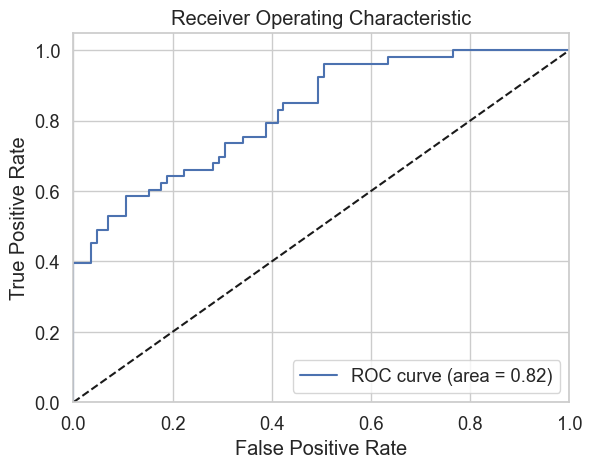

In [33]:
# Calcular las probabilidades de la clase positiva
y_score = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_score)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Realización del gráfico de la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Adicional que al final no se empleo 

Precision: 0.8666666666666667
Recall: 0.49056603773584906
F1-score: 0.6265060240963856


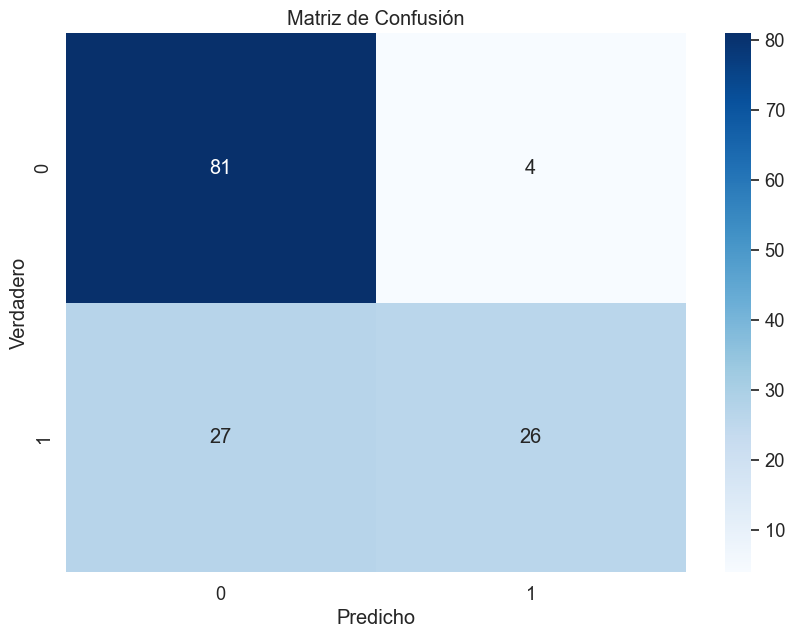

In [37]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular la precisión
precision = precision_score(y_test, y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred)


print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Para visualizar la matriz de confusión de una manera más amigable, puedes usar la función heatmap de seaborn
# Crear un heatmap con seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()